In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10788\2251267963.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("vehiclesFinal.csv")
df['year']=df['year'].astype('int64')
df.drop(['lat','long','id'],axis=1,inplace=True)
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,mohave county,2012,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,3495
1,oregon coast,2014,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,13750
2,greenville / upstate,2001,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,2300
3,mohave county,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,9000
4,maine,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,8500


In [3]:
df['year'].dtype

dtype('int64')

In [4]:
df.shape

(374222, 15)

In [5]:
df.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price'],
      dtype='object')

In [8]:
df2=df.sample(500)
df2.shape

(500, 15)

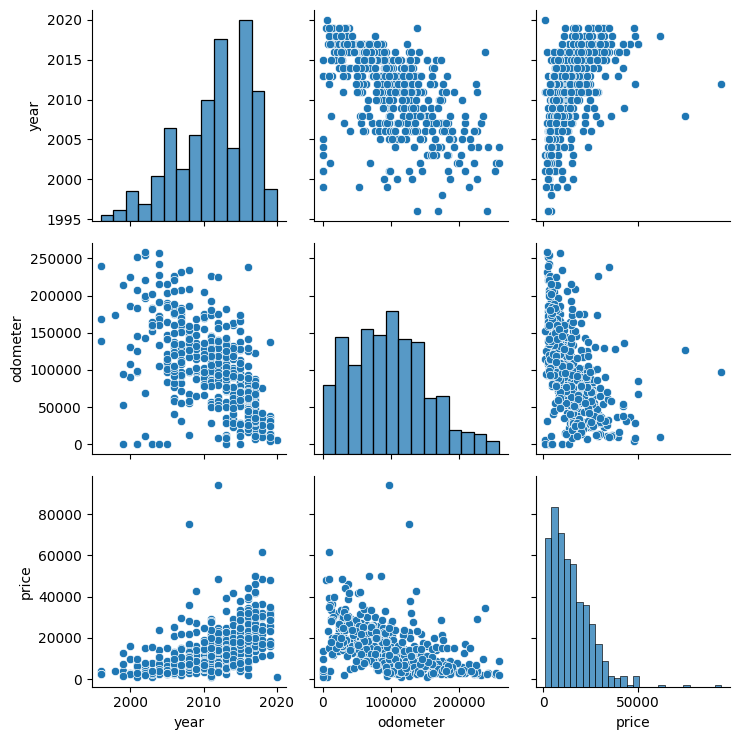

In [9]:
sns.pairplot(df2)
plt.tight_layout()

plt.show()

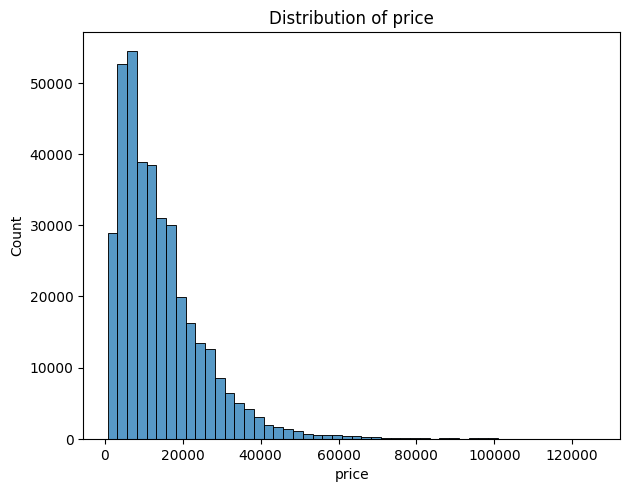

In [18]:
sns.histplot(df.price,bins=50)
plt.tight_layout()
plt.title("Distribution of price")
plt.show()

In [8]:
sns.barplot?

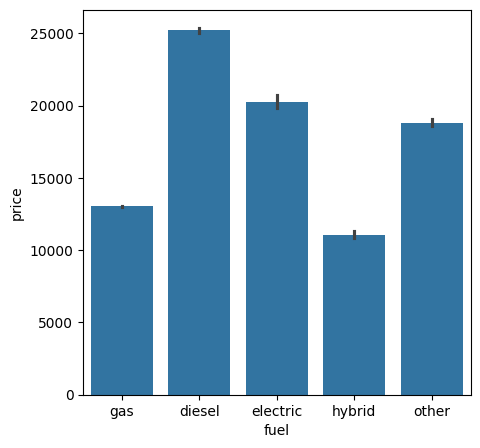

In [19]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)
sns.barplot(x='fuel',y='price',data=df)
plt.show()

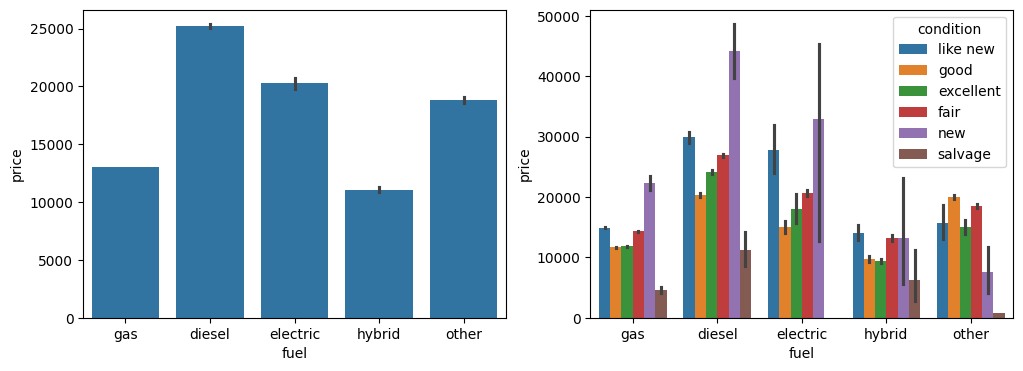

In [10]:
fig,axs=plt.subplots(ncols=2)
# plt.figure(figsize=(12,4))
fig.set_size_inches(12,4)
sns.barplot(x='fuel',y='price',hue='condition',data=df,ax=axs[1])
sns.barplot(x='fuel',y='price',data=df,ax=axs[0])
plt.savefig('Fuel vs Price')
plt.show()

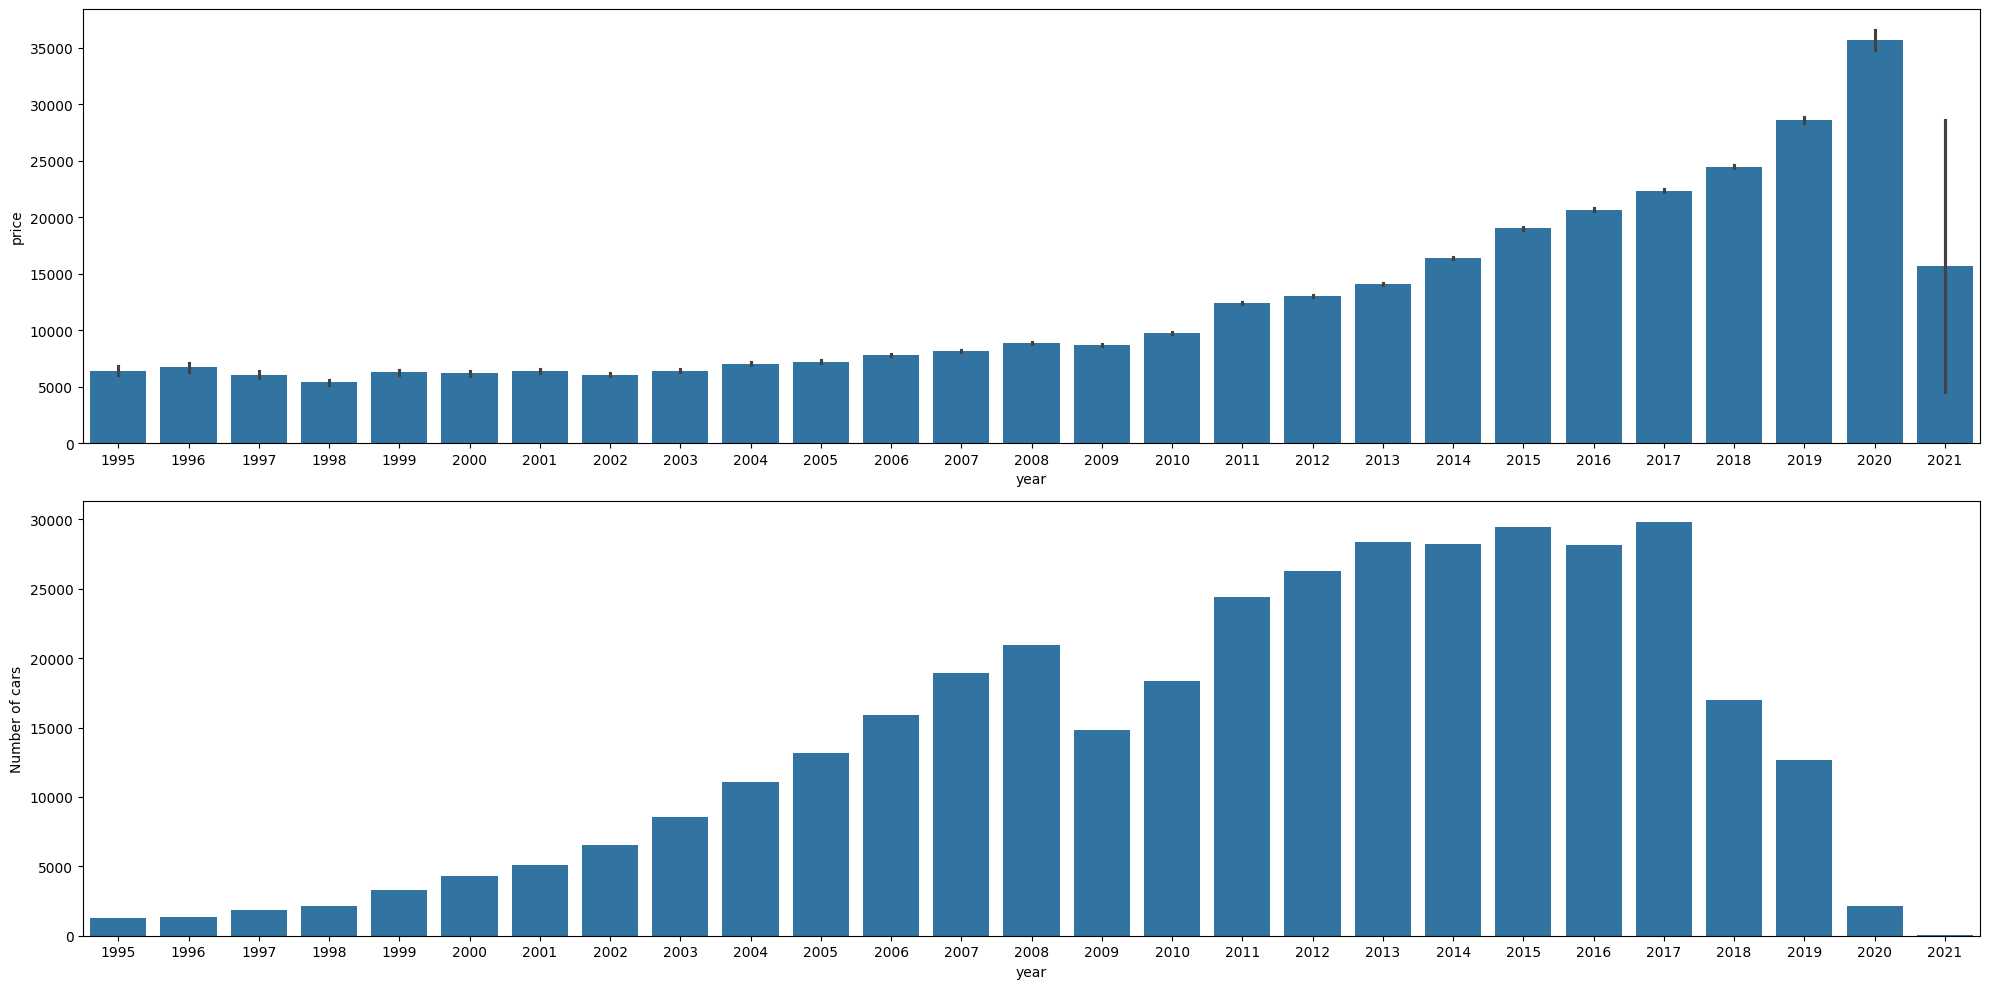

In [12]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=df,ax=axs[0])
sns.barplot(x=df.groupby('year').count()['price'].index,y=df.groupby('year').count()['price'].values,ax=axs[1])
axs[1].set_ylabel('Number of cars')
plt.savefig('year vs price')
plt.tight_layout()
plt.show()

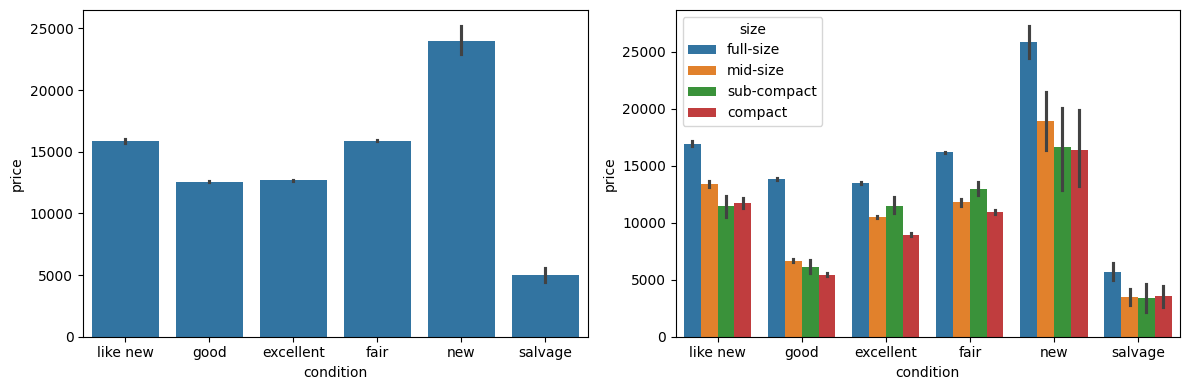

In [11]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='condition',y='price',data=df,ax=axs[0])
sns.barplot(x='condition',y='price',hue='size',data=df,ax=axs[1])

plt.tight_layout()
plt.show()

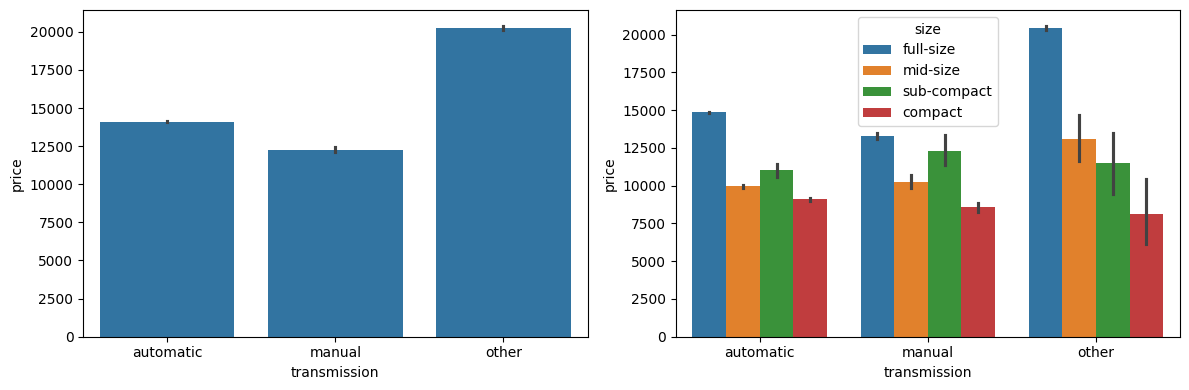

In [13]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='transmission',y='price',data=df,ax=axs[0])
sns.barplot(x='transmission',y='price',hue='size',data=df,ax=axs[1])
plt.savefig('Transmission vs Price')
plt.tight_layout()
plt.show()

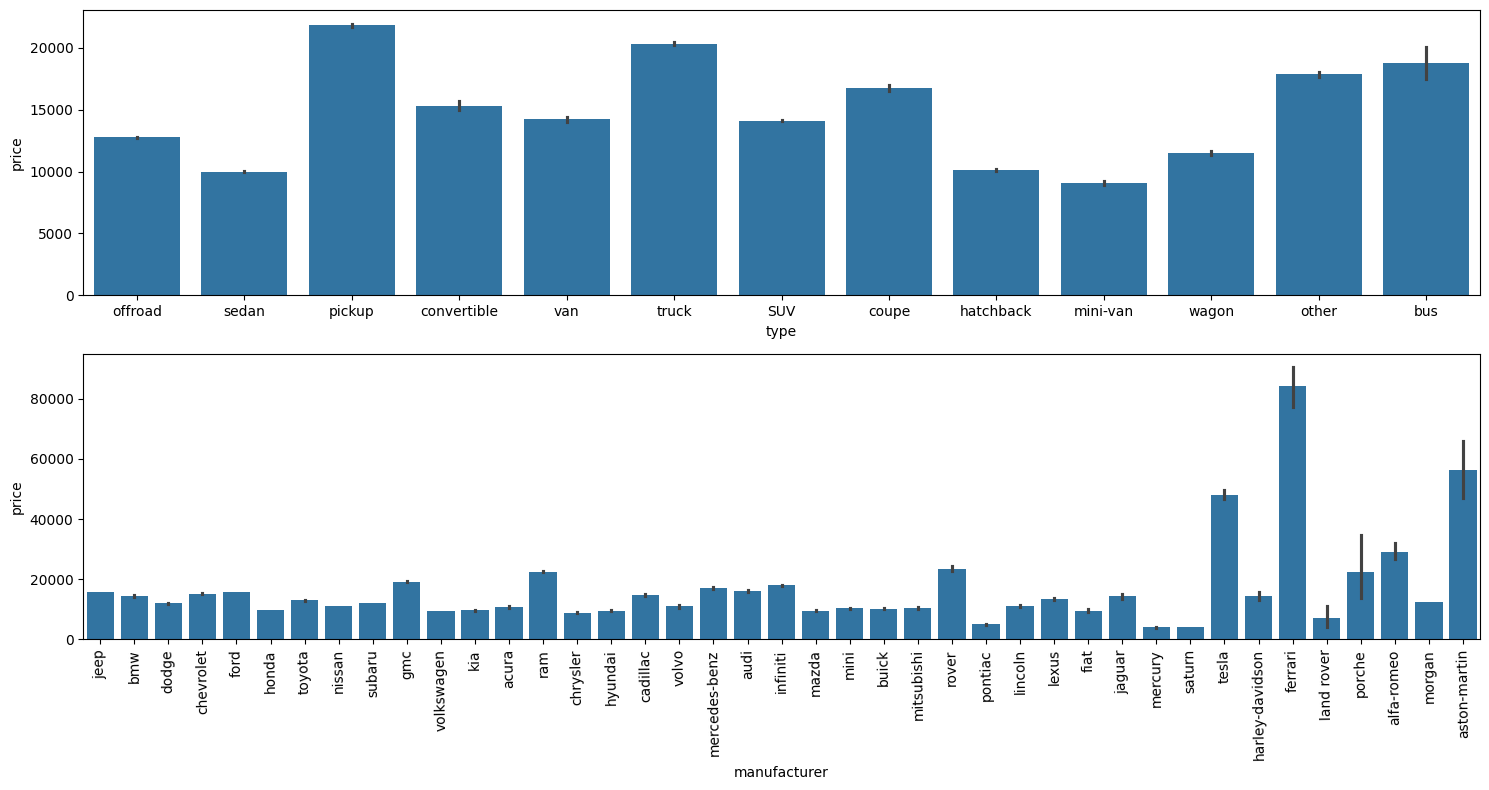

In [14]:

fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
plt.savefig('Type vs Price')
plt.tight_layout()
plt.show()

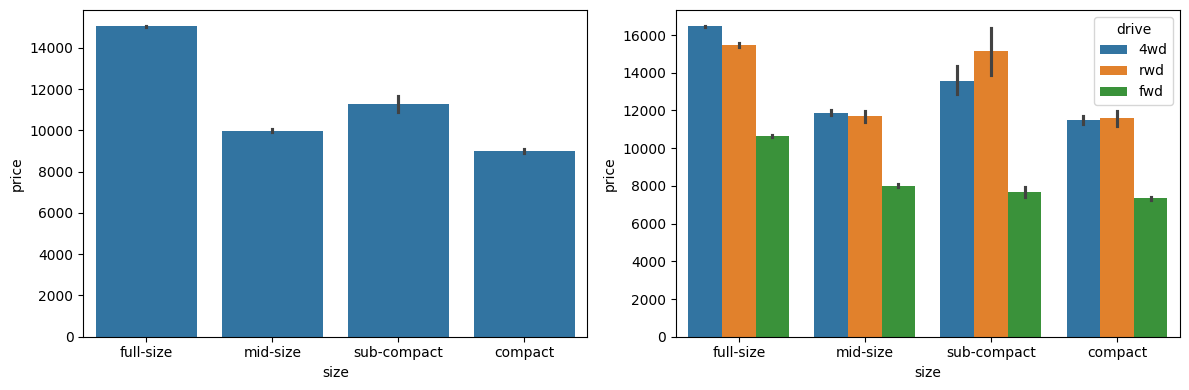

In [15]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=df,ax=axs[0])
sns.barplot(x='size',y='price',hue='drive',data=df,ax=axs[1])
plt.tight_layout()
plt.savefig('Size vs Price')
plt.show()

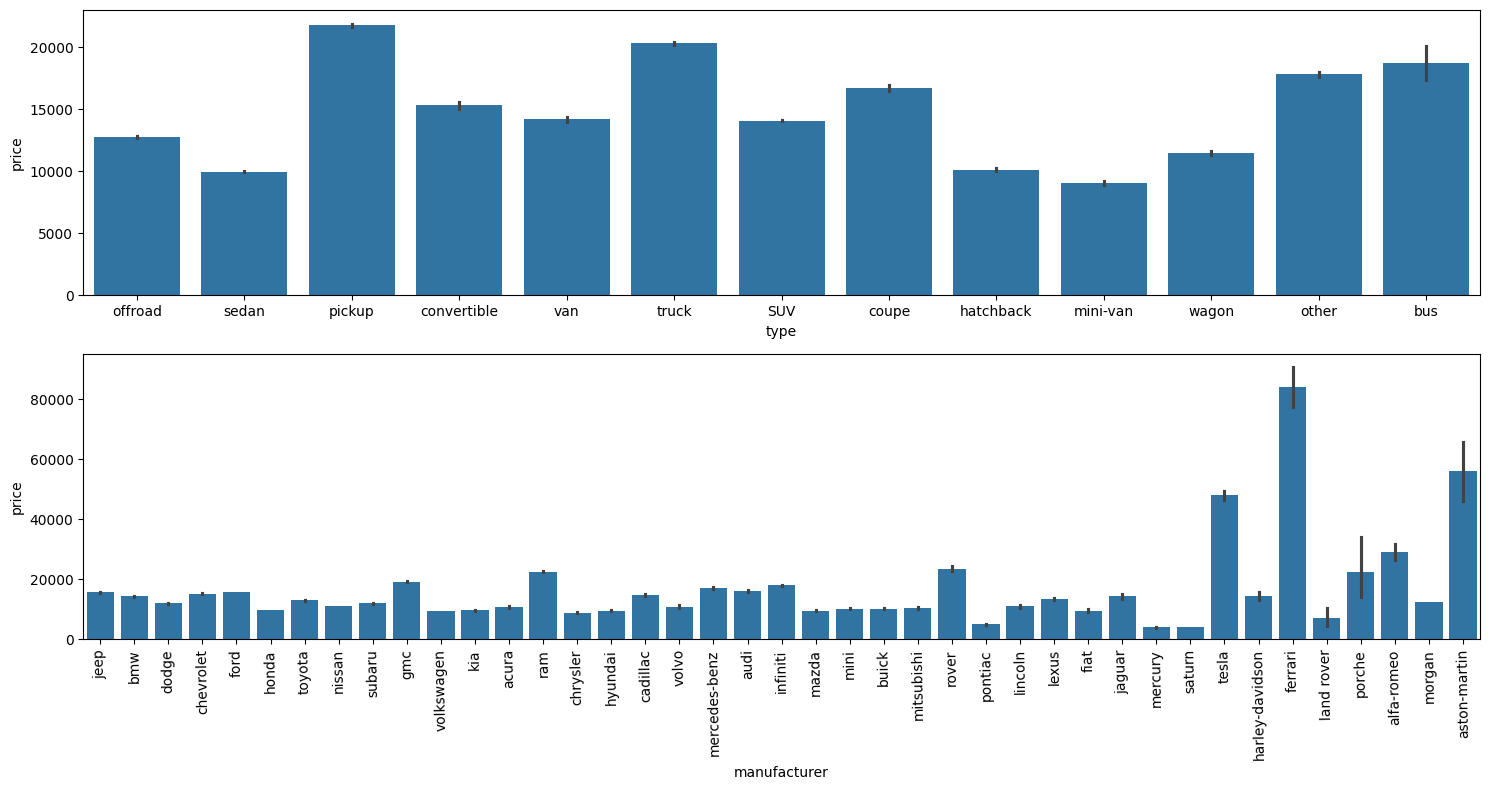

In [36]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
plt.tight_layout()
plt.show()

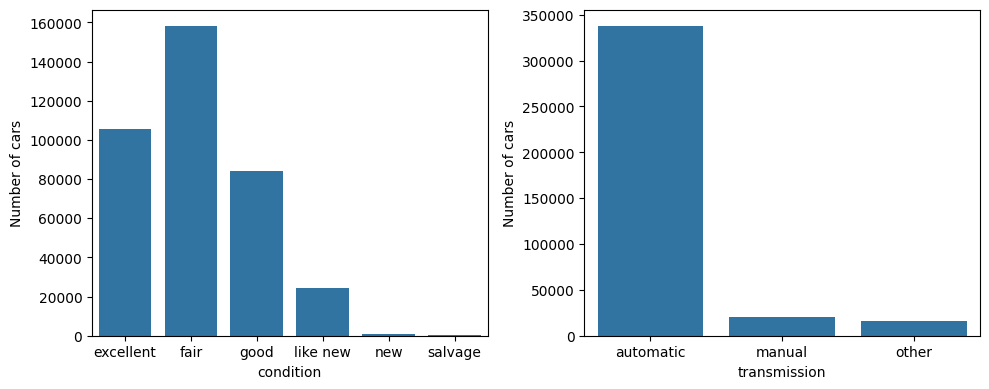

In [16]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(x=df.groupby('condition').count()['price'].index,y=df.groupby('condition').count()['price'].values,ax=axs[0])
sns.barplot(x=df.groupby('transmission').count()['price'].index,y=df.groupby('transmission').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[1].set_ylabel('Number of cars')
plt.savefig('Condition vs No of cars')
plt.tight_layout()
plt.show()

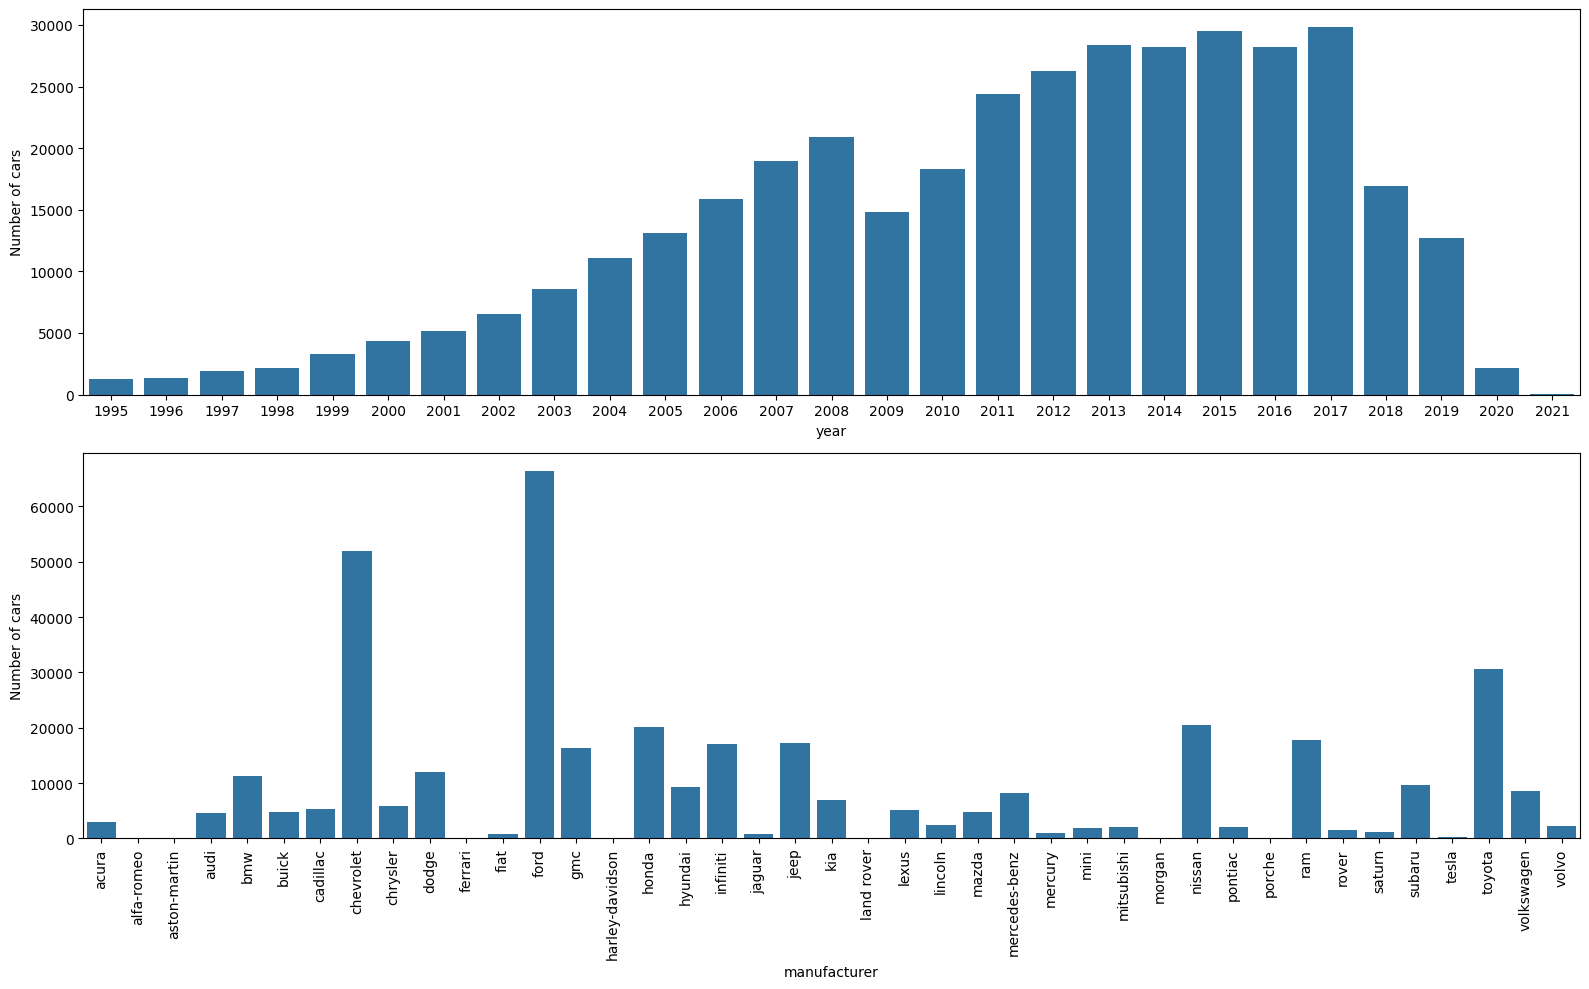

In [38]:

fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(16,10)
sns.barplot(x=df.groupby('year').count()['price'].index,y=df.groupby('year').count()['price'].values,ax=axs[0])
sns.barplot(x=df.groupby('manufacturer').count()['price'].index,y=df.groupby('manufacturer').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[1].set_ylabel('Number of cars')
axs[1].set_xticklabels(df.groupby('manufacturer').count()['price'].index,rotation=90)
plt.tight_layout()
plt.show()

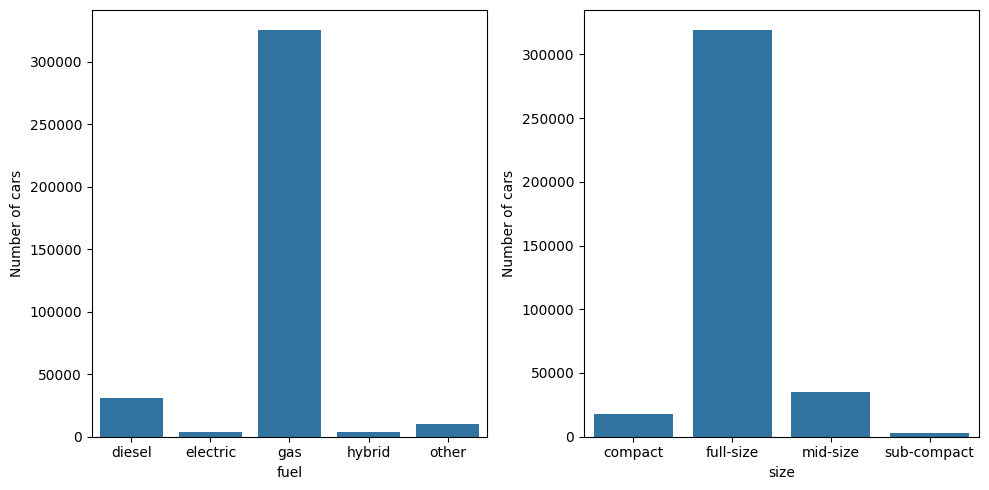

In [39]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,5)
sns.barplot(x=df.groupby('fuel').count()['price'].index,y=df.groupby('fuel').count()['price'].values,ax=axs[0])
sns.barplot(x=df.groupby('size').count()['price'].index,y=df.groupby('size').count()['price'].values,ax=axs[1])
axs[0].set_ylabel('Number of cars')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.show()